In [200]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder 

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


from matplotlib import colormaps
list(colormaps)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import Draft_wrangle as w

# Acquire

In [201]:
# Call the function to acquire the test data
# Order Matters 
# (Outpatient, inpatient, beneficiary, df)
test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()

# Call the function to acquire the train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


#### Taking a look at the data 

In [202]:
# Verify 
test_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [203]:
# Verify 
test_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# Verify 
test_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660


In [205]:
# Verify 
test_df.head(3)

,Provider
0,PRV51002
1,PRV51006
2,PRV51009


In [206]:
# Verify 
train_beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [207]:
# Verify 
train_inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
# Verify 
train_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [209]:
# Verify 
train_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [210]:
# list of all the data frames 
list_of_dataframes = [test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df]

# List of lables for the dataframes 
list_of_dataframes_name = ['test_outpatient_df', 'test_inpatient_df', 'test_beneficiary_df', 'test_df']

sep_line = '=' * 40

# Create a forloop to zip lables and DataFrame shape 
for dataframe, name in zip(list_of_dataframes, list_of_dataframes_name):
    print(f'Name: {name}')
    print(f'Shape: {dataframe.shape}')
    print(sep_line)

Name: test_outpatient_df
Shape: (125841, 27)
Name: test_inpatient_df
Shape: (9551, 30)
Name: test_beneficiary_df
Shape: (63968, 25)
Name: test_df
Shape: (1353, 1)


    - Takeaways 
- can see that they have the same number of columns
- Test data is smaller as expected 

# Prepare

In [211]:
# Combine the dataframes vertically using pd.concat
combined_df = pd.concat([train_df, test_df])
# Sort the combined dataframe based on the 'Alphanumeric_Field' column
fraud_df = combined_df.sort_values(by='Provider')

# Sort the index of the sorted dataframe
fraud_df = fraud_df.reset_index(drop=True)

# Display the sorted dataframe
print(fraud_df)


      Provider PotentialFraud
0     PRV51001             No
1     PRV51002            NaN
2     PRV51003            Yes
3     PRV51004             No
4     PRV51005            Yes
...        ...            ...
6758  PRV57759             No
6759  PRV57760             No
6760  PRV57761             No
6761  PRV57762             No
6762  PRV57763             No

[6763 rows x 2 columns]


In [212]:
fraud_df.head(3)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [213]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6763 entries, 0 to 6762
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        6763 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 105.8+ KB


In [214]:
fraud_df.shape

(6763, 2)

### Combine inpatiant data


In [215]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
# Verify 
w.DataFrame_shape(train_inpatient_df, test_inpatient_df, inpatient_df)

Sum of both train and test -> 50025
Sum of new DataFrame -> 50025


### Combind outpatiant data

In [217]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [218]:
# Verify 
w.DataFrame_shape(train_outpatient_df, test_outpatient_df, outpatient_df)

Sum of both train and test -> 643578
Sum of new DataFrame -> 643578


### Combind beneficiary data

In [219]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [220]:
# Verify 
w.DataFrame_shape(train_beneficiary_df, test_beneficiary_df, beneficiary_df)

Sum of both train and test -> 202524
Sum of new DataFrame -> 202524


### look at the test and train data (target Variable)

In [221]:
# 
train_df.info()
print(sep_line)
print(sep_line)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [222]:
print(train_df.PotentialFraud.value_counts())
print(sep_line)
print(train_df.PotentialFraud.value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


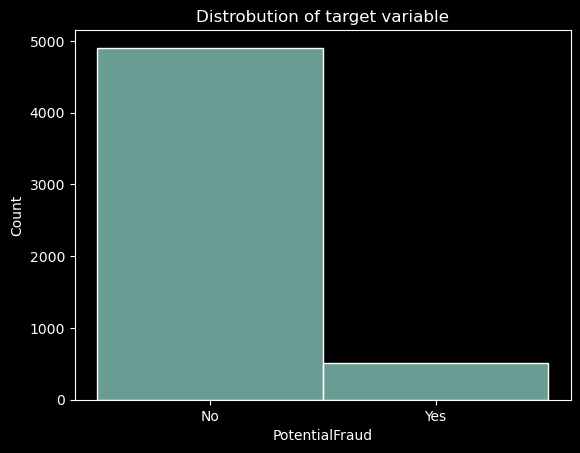

In [223]:
sns.histplot(data = train_df, x="PotentialFraud")
plt.title('Distrobution of target variable')
plt.show()

# Prepare beneficiary Data

In [224]:
beneficiary_df = w.prep_beneficiary_data(beneficiary_df)
w.beneficiary_label_encode(beneficiary_df)
beneficiary_df = w.beneficiary_OneHotLabel_encode(beneficiary_df)
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


# prepare inpatient data 


In [225]:
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
inpatient_df = w.wrangle_inpatient(inpatient_df)
inpatient_df = w.create_features_inpatient(inpatient_df)
inpatient_df.columns

Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'admissiondt', 'clmadmitdiagnosiscode',
       'deductibleamtpaid', 'dischargedt', 'diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'claimduration', 'numphysicians'],
      dtype='object')

In [227]:
inpatient_df.columns

Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'admissiondt', 'clmadmitdiagnosiscode',
       'deductibleamtpaid', 'dischargedt', 'diagnosisgroupcode',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9',
       'clmdiagnosiscode_10', 'clmprocedurecode_1', 'clmprocedurecode_2',
       'clmprocedurecode_3', 'claimduration', 'numphysicians'],
      dtype='object')

# prepare outpatiant data 

In [228]:
outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [229]:
outpatient_df = w.wrangle_outpatient(outpatient_df)
outpatient_df = w.create_features_outpatient(outpatient_df)
outpatient_df.columns


Index(['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'deductibleamtpaid', 'clmadmitdiagnosiscode',
       'claimduration'],
      dtype='object')

- Join all dataframes

In [230]:
outpatient_df.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,clmdiagnosiscode_3,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY000000,PHY000000,78943,...,V1272,00000,00000,00000,00000,00000,00000,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,PHY000000,PHY000000,6115,...,00000,00000,00000,00000,00000,00000,00000,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,PHY000000,PHY000000,2723,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY000000,PHY000000,71988,...,00000,00000,00000,00000,00000,00000,00000,0,00000,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY000000,PHY000000,82382,...,72887,4280,7197,V4577,00000,00000,00000,0,71947,0


In [231]:
inpatient_df.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,PHY000000,PHY000000,2009-04-12,...,71590,2724,19889,5849,00000,000,000,000,6,3
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,PHY000000,2009-08-31,...,00000,00000,00000,00000,00000,7092.0,000,000,2,3
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,PHY000000,PHY324689,2009-09-17,...,32723,00000,00000,00000,00000,000,000,000,3,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,4254,25062,40390,4019,00000,331.0,000,000,8,3
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,PHY000000,2009-08-13,...,486,5119,29620,20300,00000,3893.0,000,000,17,3


In [232]:
beneficiary_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,age,total_reimbursed_amt,total_deductible_amt,dob_year,dob_month,dob_day,race_0,race_1,race_2,race_3
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
0,BENE11001,0,0,0,39,230,12,12,0,1,...,66,36060,3264,1943,1,1,1,0,0,0
1,BENE11002,1,0,0,39,280,12,12,1,1,...,73,30,30,1936,9,1,1,0,0,0
1,BENE11007,0,1,0,45,610,12,12,0,0,...,69,1490,1490,1940,9,1,1,0,0,0
2,BENE11003,0,0,0,52,590,12,12,0,1,...,73,90,90,1936,8,1,1,0,0,0


In [233]:
fraud_df.columns = fraud_df.columns.str.lower()
fraud_df.head(3)

,provider,potentialfraud
0,PRV51001,No
1,PRV51002,NaN
2,PRV51003,Yes


In [234]:
outpatient_df = w.merge_outpatient_fraud(beneficiary_df, outpatient_df, fraud_df)
inpatient_df = w.merge_inpatient_fraud(beneficiary_df, inpatient_df, fraud_df)

In [235]:
outpatient_df.head(3)

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes
1,BENE11007,0,1,0,45,610,12,12,0,0,...,V4589,72887,8448,00000,00000,00000,0.0,71691,20.0,No
2,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,78099,0.0,No


In [236]:
inpatient_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
0,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No
2,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,000,000,000,3.0,3.0,No
3,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No


In [237]:
outpatient_df.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', '

In [238]:
outpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747512 entries, 0 to 747511
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   beneid                           747512 non-null  object        
 1   gender                           747512 non-null  int64         
 2   race                             747512 non-null  int64         
 3   renaldiseaseindicator            747512 non-null  int64         
 4   state                            747512 non-null  int64         
 5   county                           747512 non-null  int64         
 6   noofmonths_partacov              747512 non-null  int64         
 7   noofmonths_partbcov              747512 non-null  int64         
 8   chroniccond_alzheimer            747512 non-null  int64         
 9   chroniccond_heartfailure         747512 non-null  int64         
 10  chroniccond_kidneydisease        747512 non-

In [239]:
outpatient_df['clmdiagnosiscode_1'] = outpatient_df['clmdiagnosiscode_1'].astype(str)

In [240]:
outpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747512 entries, 0 to 747511
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   beneid                           747512 non-null  object        
 1   gender                           747512 non-null  int64         
 2   race                             747512 non-null  int64         
 3   renaldiseaseindicator            747512 non-null  int64         
 4   state                            747512 non-null  int64         
 5   county                           747512 non-null  int64         
 6   noofmonths_partacov              747512 non-null  int64         
 7   noofmonths_partbcov              747512 non-null  int64         
 8   chroniccond_alzheimer            747512 non-null  int64         
 9   chroniccond_heartfailure         747512 non-null  int64         
 10  chroniccond_kidneydisease        747512 non-

# Explore

In [241]:
inpatient_df.columns 

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'admissiondt', 'clmadmitdiagnosiscode', 'deductibleamtpaid',
       'dischargedt', 'diagnosisgro

In [242]:
outpatient_df.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', '

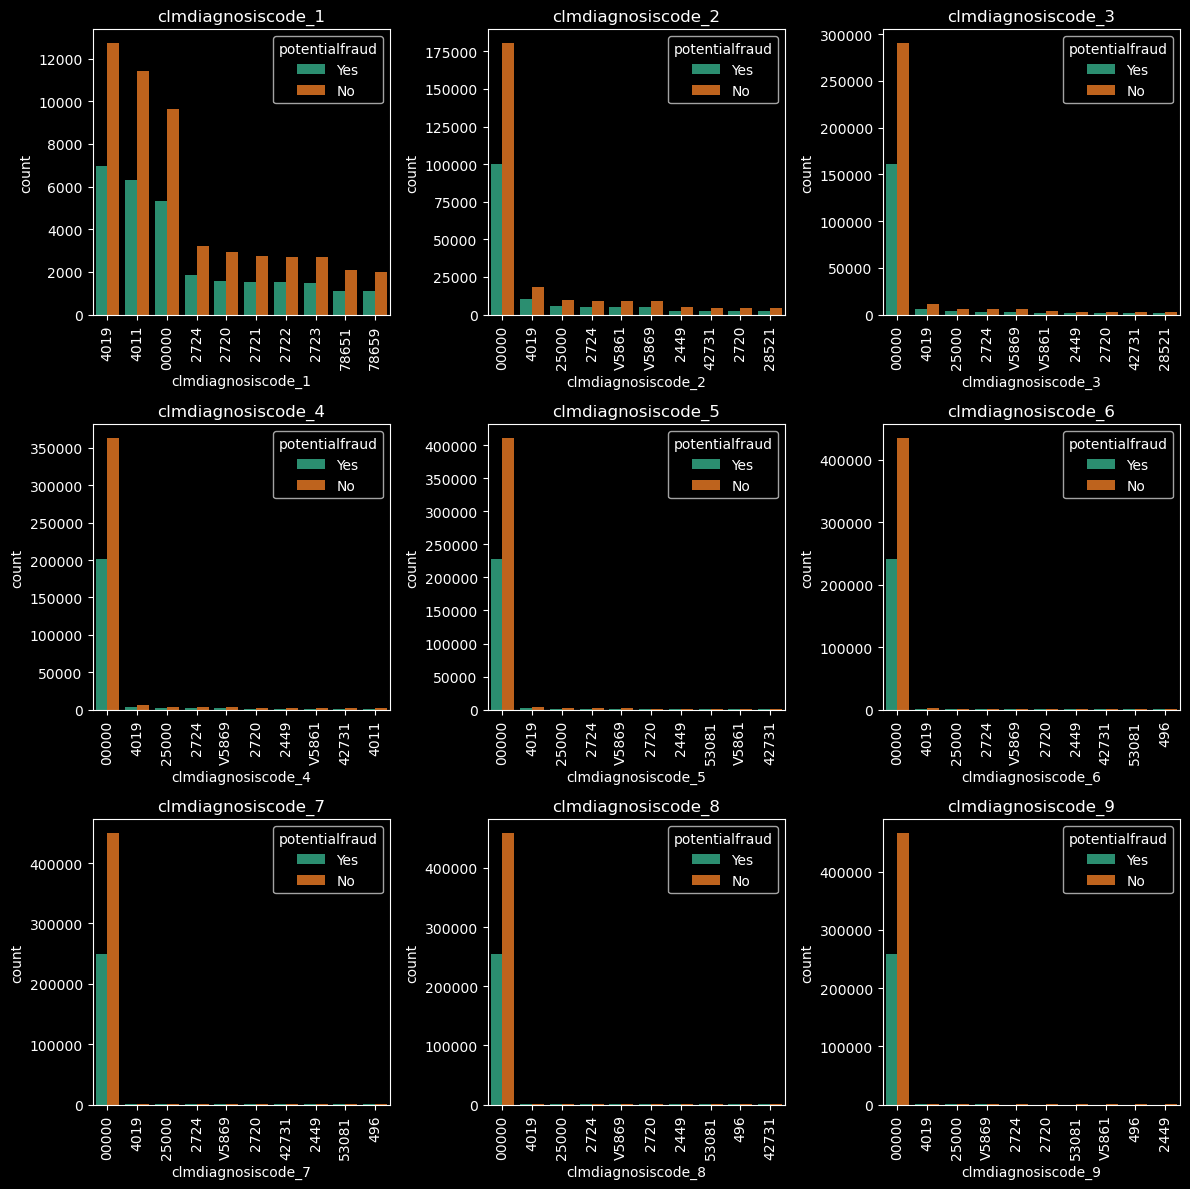

In [243]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    column_name = f'clmdiagnosiscode_{i+1}'
    code_counts = outpatient_df[column_name].value_counts()[:10]
    
    sns.countplot(data=outpatient_df, x=column_name, hue='potentialfraud', ax=ax, order=code_counts.index, palette='Dark2')
    ax.set_title(column_name)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

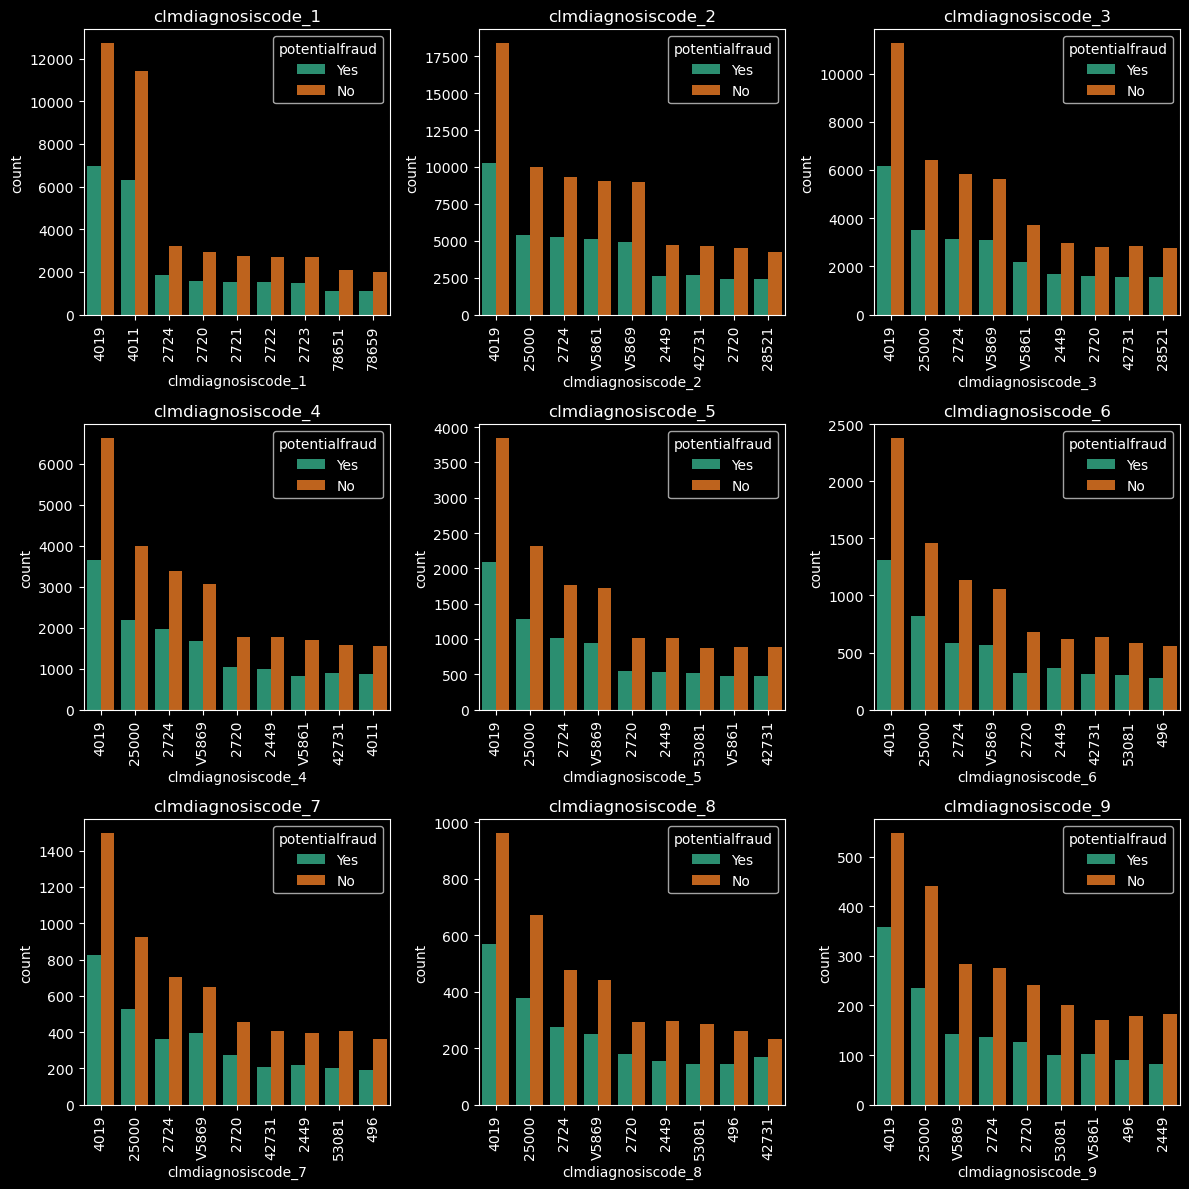

In [244]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    column_name = f'clmdiagnosiscode_{i+1}'
    code_counts = outpatient_df[column_name].value_counts()[:10]
    
    # Exclude values equal to '00000'
    code_counts = code_counts[code_counts.index != '00000']
    
    sns.countplot(data=outpatient_df, x=column_name, hue='potentialfraud', ax=ax, order=code_counts.index, palette='Dark2')
    ax.set_title(column_name)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

    - Takeaways 
- Claim Diagnostic code 4019 is the most common code. 
- 

- What providers submit the most claims? 

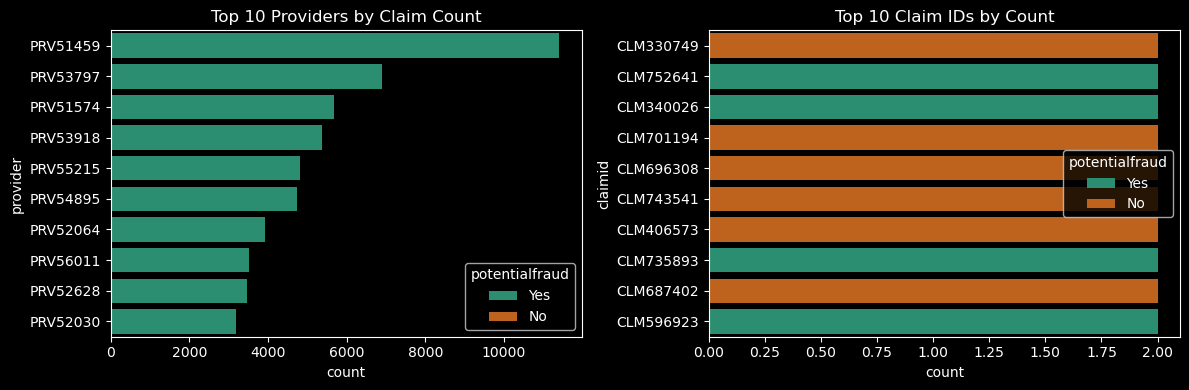

In [245]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_name = outpatient_df['provider'].value_counts()[:10]
claim_id = outpatient_df['claimid'].value_counts()[:10]

sns.countplot(data=outpatient_df, y='provider', hue='potentialfraud', ax=axes[0], order=provider_name.index, palette='Dark2')
axes[0].set_title('Top 10 Providers by Claim Count')

sns.countplot(data=outpatient_df, y='claimid', hue='potentialfraud', ax=axes[1], order=claim_id.index, palette='Dark2')
axes[1].set_title('Top 10 Claim IDs by Count')

plt.tight_layout()
plt.show()

    - Takeaways 
- providers could attenpt to hide fraud claims by doubling the claims. Abusing the system in place. 
- 

- How many of the claims submitted by the top 10 providers are fraud? 

In [246]:
# Outpatiant Yes Fraud

outpatient_fraud_df = outpatient_df[outpatient_df.potentialfraud == 'Yes']
outpatient_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes
8,BENE11004,0,0,0,39,270,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
9,BENE11004,0,0,0,39,270,12,12,0,0,...,4280,7197,V4577,00000,00000,00000,0.0,71947,0.0,Yes
10,BENE11004,0,0,0,39,270,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
11,BENE11004,0,0,0,39,270,12,12,0,0,...,V854,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes


In [247]:
# Inpatiant Yes Fraud 

inpatient_fraud_df = inpatient_df[inpatient_df.potentialfraud == 'Yes']
inpatient_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
0,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
3,BENE11001,0,0,0,39,230,12,12,0,1,...,2724,19889,5849,00000,000,000,000,6.0,3.0,Yes
8,BENE11017,1,0,0,31,270,12,12,0,0,...,2948,25000,25002,00000,863.0,000,000,6.0,3.0,Yes
12,BENE11041,1,0,0,10,150,12,12,1,0,...,00000,00000,00000,00000,000,000,000,5.0,3.0,Yes
13,BENE11041,1,0,0,10,150,12,12,1,0,...,40391,4275,4239,00000,9671.0,2724.0,000,6.0,3.0,Yes


In [248]:
# Outpatient and Inpatient Yes Fraud 

print(f'Sum of outpatient -> {outpatient_fraud_df.claimid.count()}')
print(f'Sum of intpatient -> {inpatient_fraud_df.claimid.count()}')

Sum of outpatient -> 266948
Sum of intpatient -> 34014


In [249]:
# Outpatient NOT Fraud

outpatient_NOT_fraud_df = outpatient_df[outpatient_df.potentialfraud == 'No']
outpatient_NOT_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud
1,BENE11007,0,1,0,45,610,12,12,0,0,...,V4589,72887,8448,00000,00000,00000,0.0,71691,20.0,No
2,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,78099,0.0,No
3,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,No
4,BENE11007,0,1,0,45,610,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,No
5,BENE11003,0,0,0,52,590,12,12,0,1,...,00000,00000,00000,00000,00000,00000,0.0,79380,0.0,No


In [250]:
# Inpatient NOT fraud 

inpatient_NOT_fraud_df = inpatient_df[inpatient_df.potentialfraud == 'No']
inpatient_NOT_fraud_df.head()

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
1,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No
2,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,000,000,000,3.0,3.0,No
4,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,7092.0,000,000,2.0,3.0,No
5,BENE11001,0,0,0,39,230,12,12,0,1,...,00000,00000,00000,00000,000,000,000,3.0,3.0,No
6,BENE11011,1,1,0,1,360,12,12,1,0,...,25062,40390,4019,00000,331.0,000,000,8.0,3.0,No


In [251]:
# Outpatient and Inpatient NOT Fraud 

print(f'Sum of outpatient -> {outpatient_NOT_fraud_df.claimid.count()}')
print(f'Sum of intpatient -> {inpatient_NOT_fraud_df.claimid.count()}')

Sum of outpatient -> 480564
Sum of intpatient -> 24967


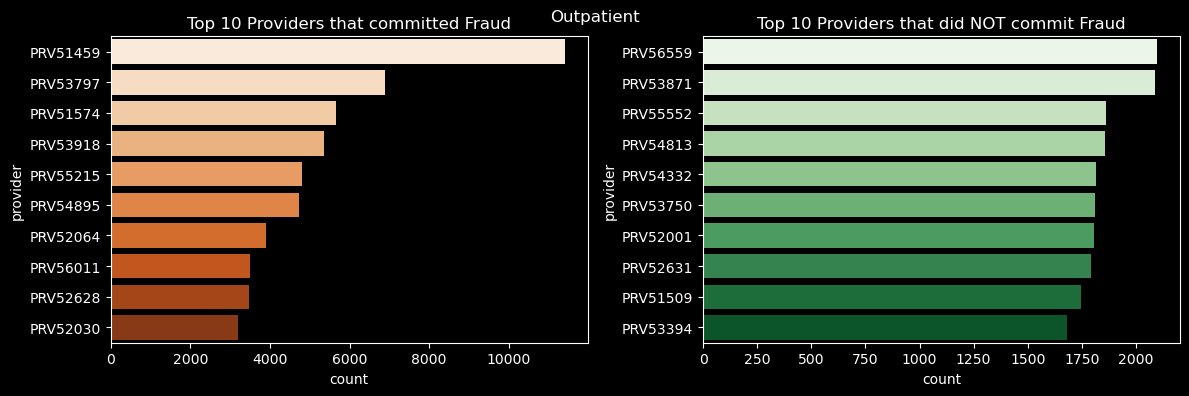

In [298]:
# OutPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = outpatient_fraud_df['provider'].value_counts()[:10]
provider_not_fraud = outpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=outpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=outpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Outpatient")
plt.show()

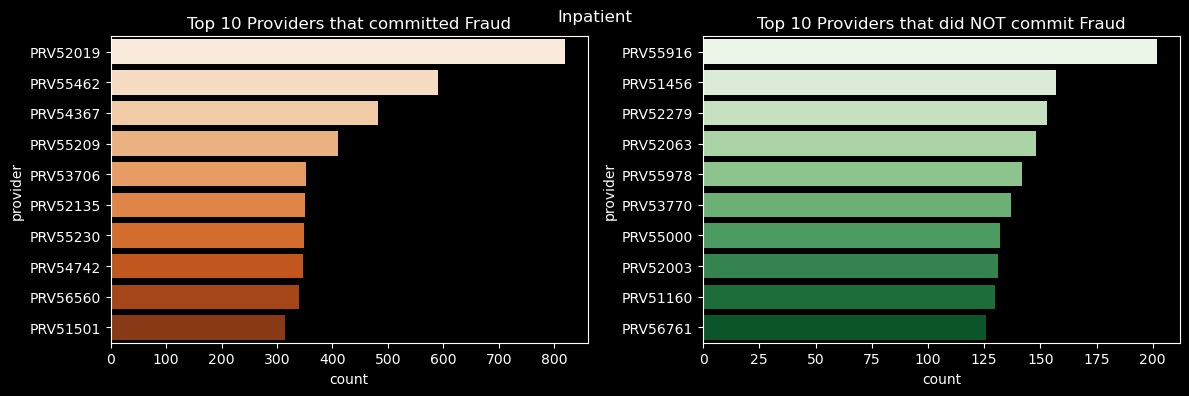

In [299]:
# InPatient

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

provider_fraud = inpatient_fraud_df['provider'].value_counts()[:10]
provider_not_fraud = inpatient_NOT_fraud_df['provider'].value_counts()[:10]

sns.countplot(data=inpatient_fraud_df, y='provider', ax=axes[0], order=provider_fraud.index, palette='Oranges')
axes[0].set_title('Top 10 Providers that committed Fraud')

sns.countplot(data=inpatient_NOT_fraud_df, y='provider', ax=axes[1], order=provider_not_fraud.index, palette='Greens')
axes[1].set_title('Top 10 Providers that did NOT commit Fraud')

plt.tight_layout()
plt.suptitle("Inpatient")
plt.show()

In [254]:
top_10_providers_out = outpatient_fraud_df['provider'].value_counts().head(10).index

claims_by_top_provider_out = outpatient_fraud_df[outpatient_fraud_df['provider'].isin(top_10_providers_out)]

claims_by_top_provider_out

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_4,clmdiagnosiscode_5,clmdiagnosiscode_6,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,deductibleamtpaid,clmadmitdiagnosiscode,claimduration,potentialfraud
0,BENE11002,1,0,0,39,280,12,12,1,1,...,00000,00000,00000,00000,00000,00000,0.0,56409,0.0,Yes
8,BENE11004,0,0,0,39,270,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
9,BENE11004,0,0,0,39,270,12,12,0,0,...,4280,7197,V4577,00000,00000,00000,0.0,71947,0.0,Yes
10,BENE11004,0,0,0,39,270,12,12,0,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
11,BENE11004,0,0,0,39,270,12,12,0,0,...,V854,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747373,BENE159166,1,0,0,5,480,12,12,1,0,...,00000,00000,00000,00000,00000,00000,100.0,00000,0.0,Yes
747385,BENE159169,1,2,0,5,140,12,12,1,0,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes
747393,BENE159171,0,0,1,10,260,12,12,0,1,...,00000,00000,00000,00000,00000,00000,0.0,43310,0.0,Yes
747440,BENE159185,1,0,0,5,90,12,12,1,1,...,00000,00000,00000,00000,00000,00000,0.0,00000,0.0,Yes


In [255]:
top_10_providers_in = inpatient_fraud_df['provider'].value_counts().head(10).index

claims_by_top_providers_in = inpatient_fraud_df[inpatient_fraud_df['provider'].isin(top_10_providers_in)]

claims_by_top_providers_in

,beneid,gender,race,renaldiseaseindicator,state,county,noofmonths_partacov,noofmonths_partbcov,chroniccond_alzheimer,chroniccond_heartfailure,...,clmdiagnosiscode_7,clmdiagnosiscode_8,clmdiagnosiscode_9,clmdiagnosiscode_10,clmprocedurecode_1,clmprocedurecode_2,clmprocedurecode_3,claimduration,numphysicians,potentialfraud
59,BENE11079,0,0,0,36,460,12,12,1,1,...,V1582,V151,00000,00000,6029.0,000,000,9.0,3.0,Yes
97,BENE11153,1,0,1,7,0,12,12,1,0,...,71535,2449,V4581,V4364,000,000,000,2.0,3.0,Yes
98,BENE11321,1,0,0,34,590,12,12,0,1,...,311,00000,00000,00000,000,000,000,2.0,3.0,Yes
130,BENE11494,1,0,0,5,200,12,12,0,0,...,2761,7823,70710,00000,000,000,000,3.0,3.0,Yes
131,BENE11494,1,0,0,5,200,12,12,0,0,...,41401,5716,25000,00000,66.0,000,000,10.0,3.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58909,BENE158926,1,0,1,21,20,12,12,0,1,...,41401,25062,V4511,3659,5123.0,000,000,9.0,3.0,Yes
58929,BENE158970,1,0,1,7,0,12,12,1,0,...,40493,58381,78701,00000,000,000,000,5.0,3.0,Yes
58934,BENE158993,0,1,0,14,141,12,12,1,0,...,53550,25000,412,00000,9904.0,000,000,4.0,3.0,Yes
58942,BENE159043,0,0,0,26,110,12,12,1,1,...,00000,00000,00000,00000,9466.0,000,000,4.0,3.0,Yes


In [256]:
claims_by_top_providers = outpatient_fraud_df[outpatient_fraud_df['provider'].isin(top_10_providers)]
claims_by_top_providers

NameError: name 'top_10_providers' is not defined

In [ ]:
break 

SyntaxError: 'break' outside loop (371449011.py, line 1)

In [ ]:
claims_by_top_providers_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, PRV51459 to PRV52030
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [ ]:
top_10_providers = inpatient_fraud_df['provider'].value_counts().head(10).index

claims_by_top_providers = inpatient_fraud_df[inpatient_fraud_df['provider'].isin(top_10_providers)]
claims_by_top_providers_in = claims_by_top_providers['provider'].value_counts()

claims_by_top_providers_in

provider
PRV52019    819
PRV55462    591
PRV54367    482
PRV55209    410
PRV53706    352
PRV52135    350
PRV55230    349
PRV54742    347
PRV56560    339
PRV51501    314
Name: count, dtype: int64

- What percent of providers are submitting fradulnent claims? 

In [ ]:
percentage_provider_fraud_i = round(len(inpatient_fraud_df.claimid) / (len(inpatient_fraud_df.claimid) + len(inpatient_NOT_fraud_df.claimid)) * 100, 2)
percentage_provider_fraud_o = round(len(outpatient_fraud_df.claimid) / (len(outpatient_fraud_df.claimid) + len(outpatient_NOT_fraud_df.claimid)) * 100, 2)

print(f'Percentage of Inpatient Providers committing fraud: {percentage_provider_fraud_i}%')
print(f'Percentage of Outpatient Providers committing fraud: {percentage_provider_fraud_o}%')

Percentage of Inpatient Providers committing fraud: 57.67%
Percentage of Outpatient Providers committing fraud: 35.71%


In [ ]:
provider_1 = claim_is_fraud_i[claim_is_fraud_i.provider == 'PRV52019']

In [ ]:
provider_1.claimid.value_counts()

claimid
CLM77501    2
CLM41243    2
CLM62318    2
CLM76647    2
CLM34066    2
           ..
CLM32696    1
CLM40831    1
CLM41297    1
CLM68600    1
CLM52889    1
Name: count, Length: 516, dtype: int64

In [ ]:
# Stats test 

# Providers in inpatient commit more fraud than providers in outpatient.  


    - Takeaways 
- claims that have been submitted 2 times are more likely fraud

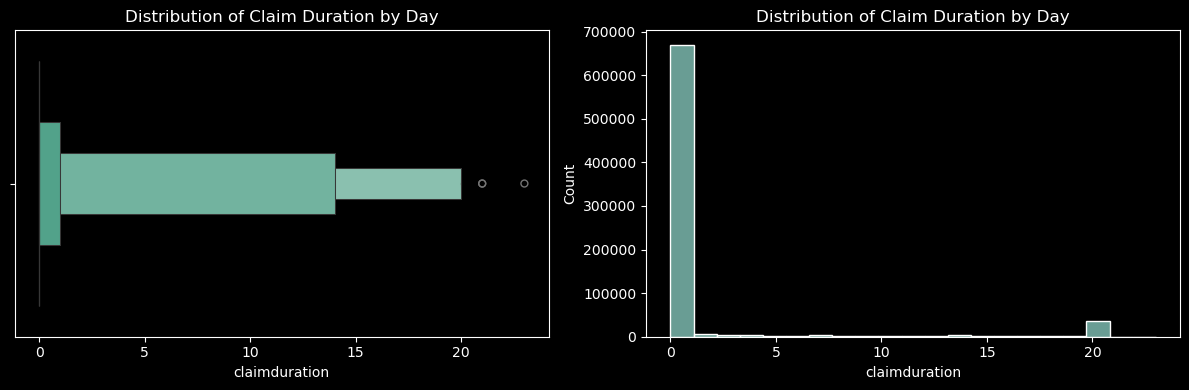

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxenplot(data=outpatient_df, x='claimduration', ax=axes[0], palette='Dark2')
axes[0].set_title('Distribution of Claim Duration by Day')

sns.histplot(data=outpatient_df, x='claimduration', ax=axes[1], palette='Dark2')
axes[1].set_title('Distribution of Claim Duration by Day')

plt.tight_layout()
plt.show()

In [ ]:
list_of_chronic_conditions = ['chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke']



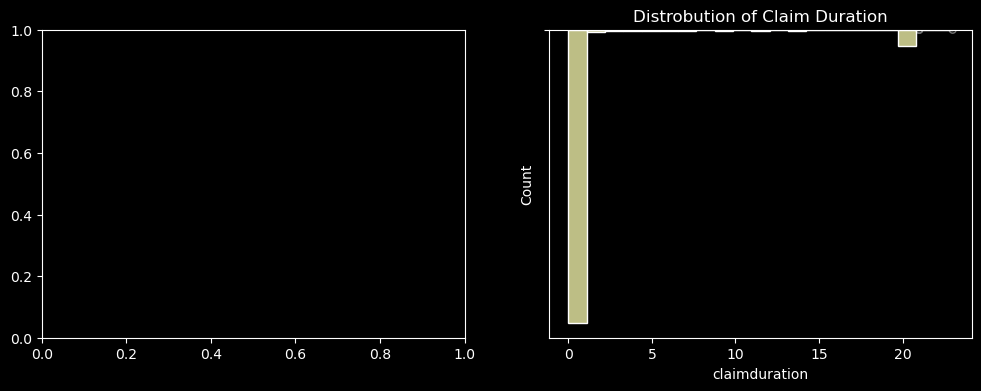

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxenplot(data= outpatient_df, x='claimduration')
plt.title('Distrobution of Claim Duration')

sns.histplot(data= outpatient_df, x='claimduration')
plt.title('Distrobution of Claim Duration')

plt.show()

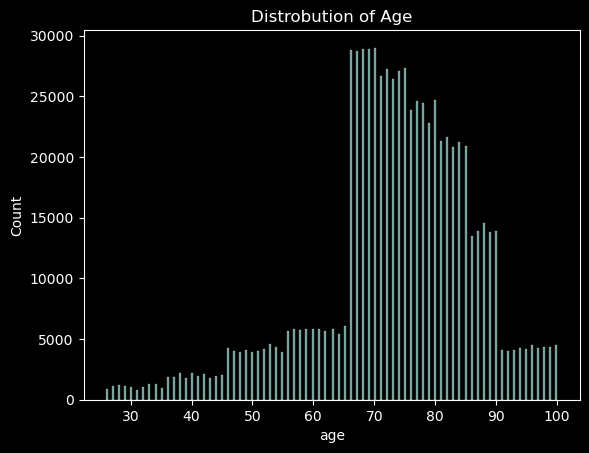

In [ ]:
sns.histplot(data= outpatient_df, x='age')
plt.title('Distrobution of Age')
plt.show()

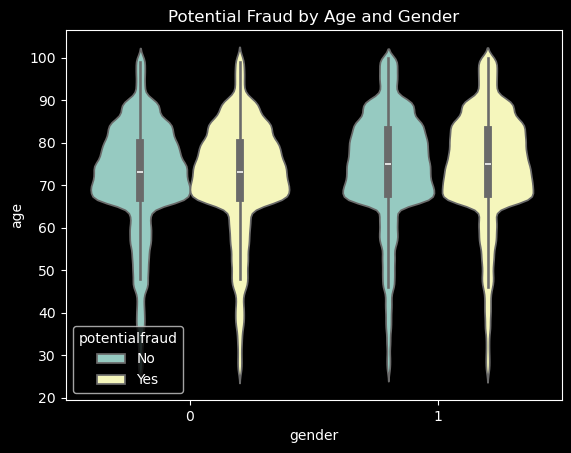

In [ ]:
sns.violinplot(data=outpatient_df, x="gender", y="age", hue="potentialfraud")
plt.title('Potential Fraud by Age and Gender')
plt.show()

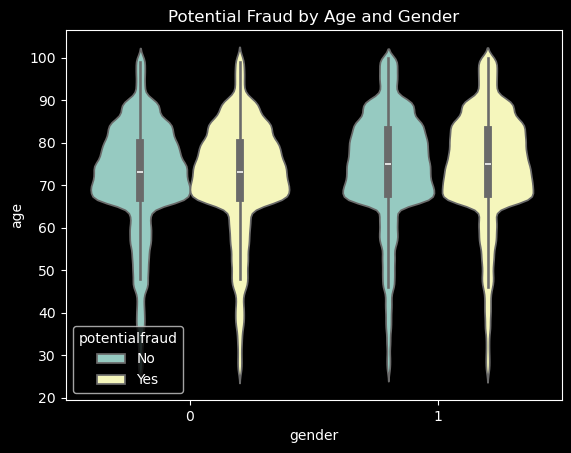

In [ ]:
sns.violinplot(data=outpatient_df, x="gender", y="age", hue="potentialfraud")
plt.title('Potential Fraud by Age and Gender')
plt.show()

In [ ]:
sns.scatterplot(data=outpatient_df, x='age', y='claimid', hue='potentialfraud')
plt.title('')

KeyboardInterrupt: 

# Split Data 

In [257]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    '''splits data into train test and validate dataframes'''
    train, test = train_test_split(df, test_size=.2, random_state=117, stratify=df.potentialfraud)
    train, validate = train_test_split(train,
                                       test_size=.3,
                                       random_state=117, stratify=train.potentialfraud)
    return train, validate, test

In [258]:
train_out, validate_out, test_out = split_data(outpatient_df)
train_in, validate_in, test_in = split_data(inpatient_df)

In [259]:

print(f'Outpatient Train-> {train_out.shape}')
print(f'Outpatient Validate -> {validate_out.shape}')
print(f'Outpatient Test -> {test_out.shape}')
print(sep_line)
print(f'Inpatient Train -> {train_in.shape}')
print(f'Inpatient Validate -> {validate_in.shape}')
print(f'Inpatient Test -> {test_in.shape}')

Outpatient Train-> (418606, 55)
Outpatient Validate -> (179403, 55)
Outpatient Test -> (149503, 55)
Inpatient Train -> (33028, 63)
Inpatient Validate -> (14156, 63)
Inpatient Test -> (11797, 63)


# Feature Selection 

In [260]:
outpatient_df.columns

Index(['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3', 'claimid',
       'claimstartdt', 'claimenddt', 'provider', 'inscclaimamtreimbursed',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', '

In [261]:
outpatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747512 entries, 0 to 747511
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   beneid                           747512 non-null  object        
 1   gender                           747512 non-null  int64         
 2   race                             747512 non-null  int64         
 3   renaldiseaseindicator            747512 non-null  int64         
 4   state                            747512 non-null  int64         
 5   county                           747512 non-null  int64         
 6   noofmonths_partacov              747512 non-null  int64         
 7   noofmonths_partbcov              747512 non-null  int64         
 8   chroniccond_alzheimer            747512 non-null  int64         
 9   chroniccond_heartfailure         747512 non-null  int64         
 10  chroniccond_kidneydisease        747512 non-

In [262]:
['beneid', 'gender', 'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'deceased', 'age',
       'total_reimbursed_amt', 'total_deductible_amt', 'dob_year', 'dob_month',
       'dob_day', 'race_0', 'race_1', 'race_2', 'race_3',
       'claimstartdt', 'claimenddt',
       'attendingphysician', 'operatingphysician', 'otherphysician',
       'clmdiagnosiscode_1', 'clmdiagnosiscode_2', 'clmdiagnosiscode_3',
       'clmdiagnosiscode_4', 'clmdiagnosiscode_5', 'clmdiagnosiscode_6',
       'clmdiagnosiscode_7', 'clmdiagnosiscode_8', 'clmdiagnosiscode_9', 'clmadmitdiagnosiscode',
       'potentialfraud']

['beneid',
 'gender',
 'race',
 'renaldiseaseindicator',
 'state',
 'county',
 'noofmonths_partacov',
 'noofmonths_partbcov',
 'chroniccond_alzheimer',
 'chroniccond_heartfailure',
 'chroniccond_kidneydisease',
 'chroniccond_cancer',
 'chroniccond_obstrpulmonary',
 'chroniccond_depression',
 'chroniccond_diabetes',
 'chroniccond_ischemicheart',
 'chroniccond_osteoporasis',
 'chroniccond_rheumatoidarthritis',
 'chroniccond_stroke',
 'ipannualreimbursementamt',
 'ipannualdeductibleamt',
 'opannualreimbursementamt',
 'opannualdeductibleamt',
 'deceased',
 'age',
 'total_reimbursed_amt',
 'total_deductible_amt',
 'dob_year',
 'dob_month',
 'dob_day',
 'race_0',
 'race_1',
 'race_2',
 'race_3',
 'claimstartdt',
 'claimenddt',
 'attendingphysician',
 'operatingphysician',
 'otherphysician',
 'clmdiagnosiscode_1',
 'clmdiagnosiscode_2',
 'clmdiagnosiscode_3',
 'clmdiagnosiscode_4',
 'clmdiagnosiscode_5',
 'clmdiagnosiscode_6',
 'clmdiagnosiscode_7',
 'clmdiagnosiscode_8',
 'clmdiagnosiscode_9

In [263]:
X_train1 = train_out[['deductibleamtpaid', 'age']]
y_train1 = train_out.potentialfraud

X_validate1 = validate_out[['deductibleamtpaid', 'age']]
y_validate1 = validate_out.potentialfraud

X_test1 = test_out[['deductibleamtpaid', 'age']]
y_test1 = test_out.potentialfraud

In [264]:
X_train2 = train_in[['deductibleamtpaid', 'age']]
y_train2 = train_in.potentialfraud

X_validate2 = validate_in[['deductibleamtpaid', 'age']]
y_validate2 = validate_in.potentialfraud

X_test2 = test_in[['deductibleamtpaid', 'age']]
y_test2 = test_in.potentialfraud

# BaseLine

In [266]:
inpatient_baseline_accuracy = (inpatient_df['potentialfraud'].value_counts().idxmax() == inpatient_df.potentialfraud).mean()
outpatient_baseline_accuracy = (outpatient_df['potentialfraud'].value_counts().idxmax() == outpatient_df.potentialfraud).mean()

print(f'Outpatient Baseline accuracy -> {outpatient_baseline_accuracy}')
print(f'Inpatient Baseline accuracy -> {inpatient_baseline_accuracy}')

Outpatient Baseline accuracy -> 0.6428846627211335
Inpatient Baseline accuracy -> 0.5766941896542954


# Models

# Decision Tree (Outpatient)

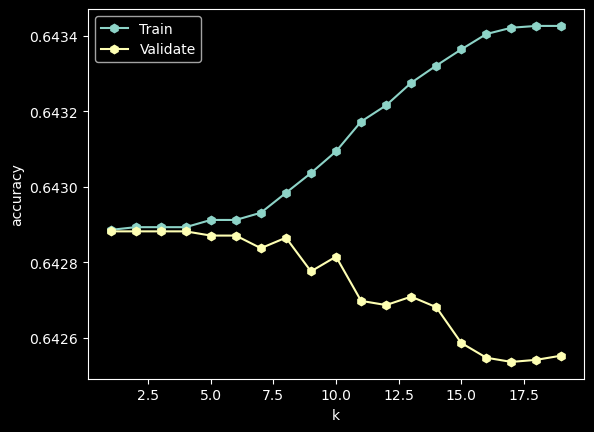

In [267]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train1, y_train1)
    train_score.append(clf.score(X_train1, y_train1))
    validate_score.append(clf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [268]:

clf = DecisionTreeClassifier(max_depth=6, random_state=117)
clf.fit(X_train1, y_train1)
dt_tr_acc = clf.score(X_train1, y_train1)
dt_val_acc = clf.score(X_validate1, y_validate1)

In [269]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
64.291243%

Validation Accuracy:
64.287108%

Baseline Accuracy:
64.288466%


# Decision Tree (Inpatient)

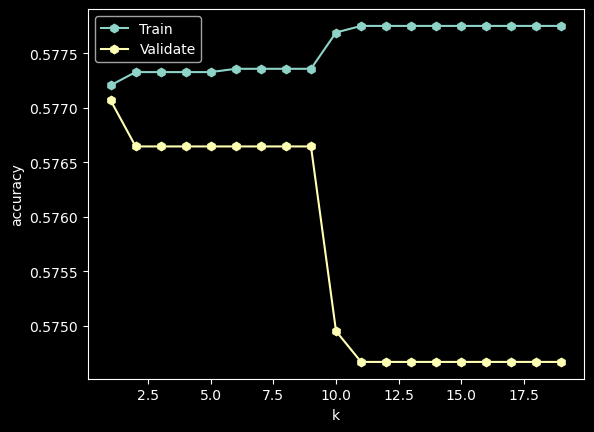

In [270]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    clf = DecisionTreeClassifier(max_depth=k, random_state=117)
    clf.fit(X_train2, y_train2)
    train_score.append(clf.score(X_train2, y_train2))
    validate_score.append(clf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [271]:
clf = DecisionTreeClassifier(max_depth=6, random_state=117)
clf.fit(X_train2, y_train2)
dt_tr_acc = clf.score(X_train2, y_train2)
dt_val_acc = clf.score(X_validate2, y_validate2)

In [284]:
print(f'Ideal Decision Tree Accuracy Scores:\n\n\
Training Accuracy:\n{dt_tr_acc:2%}\n\n\
Validation Accuracy:\n{dt_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Decision Tree Accuracy Scores:

Training Accuracy:
57.735860%

Validation Accuracy:
57.664595%

Baseline Accuracy:
57.669419%


# Random Forest (Outpatient)

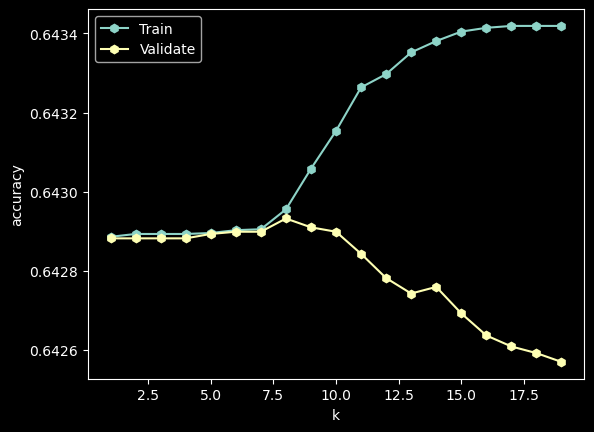

In [273]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train1, y_train1)
    train_score.append(rf.score(X_train1, y_train1))
    validate_score.append(rf.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [274]:
rf = KNeighborsClassifier(n_neighbors=8)
rf.fit(X_train1, y_train1)
rf_tr_acc = rf.score(X_train1,y_train1)
rf_val_acc = rf.score(X_validate1, y_validate1)

In [275]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
59.935357%

Validation Accuracy:
59.752067%

Baseline Accuracy:
64.288466%


# Random Forest (Inpatient)

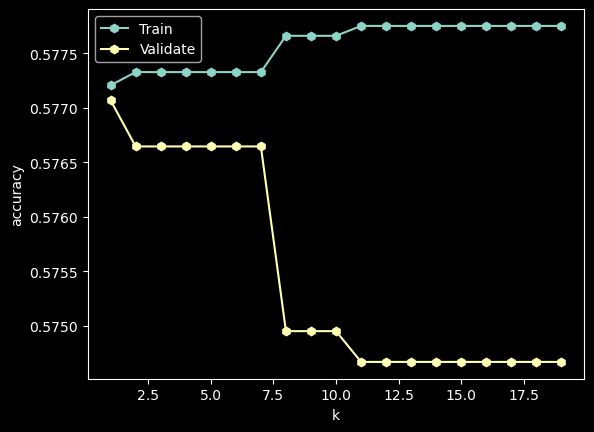

In [285]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    rf = RandomForestClassifier(max_depth = k, random_state=117)
    rf.fit(X_train2, y_train2)
    train_score.append(rf.score(X_train2, y_train2))
    validate_score.append(rf.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [286]:
rf = KNeighborsClassifier(n_neighbors=8)
rf.fit(X_train2, y_train2)
rf_tr_acc = rf.score(X_train2,y_train2)
rf_val_acc = rf.score(X_validate2, y_validate2)

In [287]:
print(f'Ideal Random Forest Accuracy Scores:\n\n\
Training Accuracy:\n{rf_tr_acc:2%}\n\n\
Validation Accuracy:\n{rf_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal Random Forest Accuracy Scores:

Training Accuracy:
52.077026%

Validation Accuracy:
52.338231%

Baseline Accuracy:
57.669419%


# KNearest Neighbor (Outpatient)

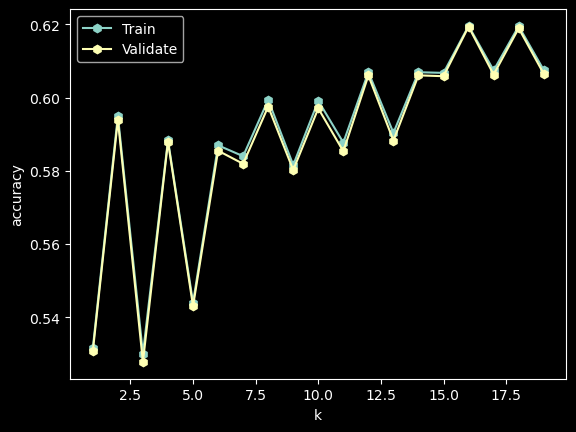

In [288]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    train_score.append(knn.score(X_train1, y_train1))
    validate_score.append(knn.score(X_validate1, y_validate1))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [289]:
knn1 = KNeighborsClassifier(n_neighbors=10)
knn1.fit(X_train1, y_train1)
knn_tr_acc = knn1.score(X_train1,y_train1)
knn_val_acc = knn1.score(X_validate1, y_validate1)

In [290]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{outpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
59.910990%

Validation Accuracy:
59.701900%

Baseline Accuracy:
64.288466%


# KNearest Neighbor (Inpatient)

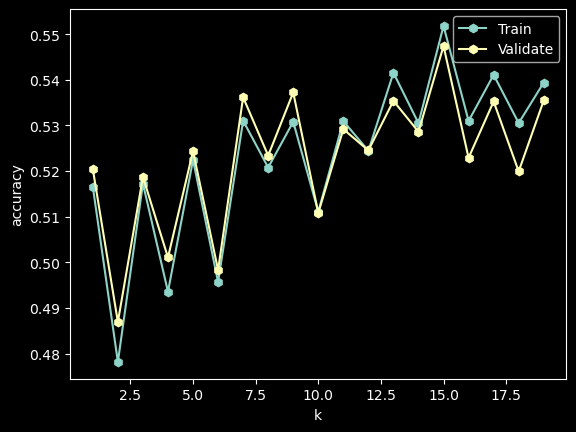

In [291]:
k_range = range(1,20)
train_score = []
validate_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    train_score.append(knn.score(X_train2, y_train2))
    validate_score.append(knn.score(X_validate2, y_validate2))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_score, label = 'Train', marker='h')
plt.plot(k_range, validate_score, label = 'Validate', marker='h')
plt.legend()
plt.show()

In [292]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train2, y_train2)
knn_tr_acc = knn2.score(X_train2,y_train2)
knn_val_acc = knn2.score(X_validate2, y_validate2)

In [293]:
print(f'Ideal KNearest Neighbor Accuracy Scores:\n\n\
Training Accuracy:\n{knn_tr_acc:2%}\n\n\
Validation Accuracy:\n{knn_val_acc:2%}\n\n\
Baseline Accuracy:\n{inpatient_baseline_accuracy:2%}')

Ideal KNearest Neighbor Accuracy Scores:

Training Accuracy:
51.108151%

Validation Accuracy:
51.080814%

Baseline Accuracy:
57.669419%


# Logistic Regression (Outpatient)

In [294]:
lr1 = LogisticRegression(random_state=117)
lr1.fit(X_train1, y_train1)
lr_tr_acc1 = lr1.score(X_train1,y_train1)

lr1.fit(X_validate1, y_validate1)
lr_val_acc1 = lr1.score(X_validate1, y_validate1)

In [295]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{outpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc1:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc1:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
64.288466%

Model Train Accuracy Score:
64.288615%
Model Validate Accuracy Score:
64.288223%


# Logistic Regression (Inpatient)

In [296]:
lr2 = LogisticRegression(random_state=117)
lr2.fit(X_train2, y_train2)
lr_tr_acc2 = lr2.score(X_train2,y_train2)

lr2.fit(X_validate2, y_validate2)
lr_val_acc2 = lr2.score(X_validate2, y_validate2)

In [297]:
print(f'Logistic Regression Model Accuracy Scores:\n\n\
Baseline Accuracy Score:\n{inpatient_baseline_accuracy:2%}\n\n\
Model Train Accuracy Score:\n{lr_tr_acc2:2%}\n\
Model Validate Accuracy Score:\n{lr_val_acc2:2%}')

Logistic Regression Model Accuracy Scores:

Baseline Accuracy Score:
57.669419%

Model Train Accuracy Score:
57.669250%
Model Validate Accuracy Score:
57.671659%
